<a href="https://colab.research.google.com/github/TeoTheMayo/DataScienceLondon-Teo/blob/main/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and Predicting the Change in Annual global Temeperatures

*Collaborators: **Teo Nickola** & London Jones* **bold text**

  The goal of this project is to analyze with the intent to predict the future temperatures of the next 10-15 years, using historical temperature data from each country.



*Collaboration Plan:*

  A: How are we working together?
    London and I live in the same building, so we have set a weekly meeting at 2:00pm on Friday to discuss the week goals. We have each other's phone numbers, and see each other often outside of class, and often check up on each other's progress for the week, to ensure all deadlines are met.
  B: What Technologies are we using:
    Both my partner and I have access to google Colab and jupyter Notebook, which we will be using to parse the datasets and create the needed graphs to display the data and trends. We are hosting a github repository in which we both have collaborator level access in order to commit changes.
  C: When do we plan to meet:
    We plan to have a weekly planner meeting every friday at 2pm, in one of our living rooms. In these meetings we will discuss the work that needs to be completed for the week and begin working. If we deem it necessary to meet another time before the next meeting, we can easily plan accordingly considering we have each other's contact information.  



*Data Sets*

  The first data set shows the average temperature, per country, per month, dating back all the way to the early 18th century. Using this data set, we hope to get a general temperature prediction for the next following years for each country and the world.

  Another dataset we identified is the carbon emission data set. The carbon emission data set lists the carbon emissions (CO2) per country, per year, dating all the way back to the mid 20th century. This data set is used with the intention of understanding what type of impact carbon emissions and climate change have on global temperatures.




*The Goal*

  The goal is to estimate the next 10-15 years annual temperature based on the historic temperatures of the world, and also the impact that CO2 emission has on temperatures. Other datasets may be included for more detailed analysis.



*Extract, Load, and Transform*

We begin by downloading and importing our first data set, so that we may be able to access it with google colab. The first data set shows us the average surface temperature by country, and month.


In [3]:
import kagglehub

path = kagglehub.dataset_download("palinatx/mean-temperature-for-countries-by-year-2014-2022")


print(path)

/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3


In [ ]:
!cd /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2
!ls /root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv



/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

cityTemp = pd.read_csv('/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv')
cityTemp = pd.DataFrame(cityTemp)


display(cityTemp.tail(5).reset_index())
display(cityTemp.dtypes)


,index,Country,Year,Annual Mean,5-yr smooth,Code
0,20735,Switzerland,2018,7.68,7.27,CHE
1,20736,Switzerland,2019,7.31,7.34,CHE
2,20737,Switzerland,2020,7.64,7.38,CHE
3,20738,Switzerland,2021,6.39,7.42,CHE
4,20739,Switzerland,2022,8.08,7.44,CHE


,0
Country,object
Year,int64
Annual Mean,float64
5-yr smooth,float64
Code,object


Graphs averagure temperatures for the Hottest Country and Coldest Country

Mali
Russian Federation


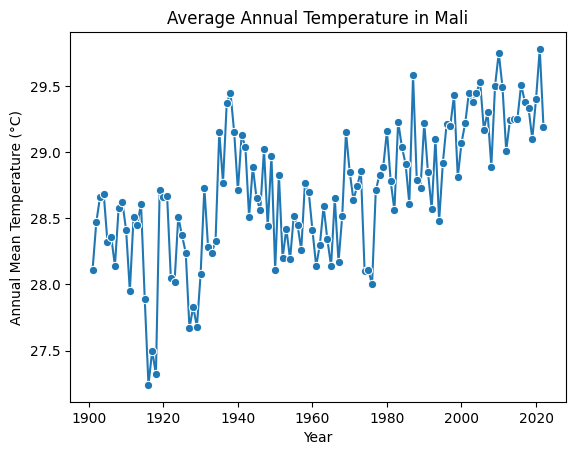

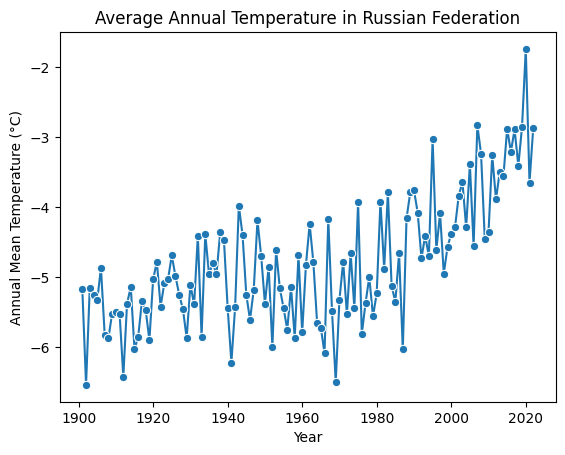

In [5]:
hottest_country = cityTemp.groupby('Country')['Annual Mean'].mean().idxmax()
coldest_country = cityTemp.groupby('Country')['Annual Mean'].mean().idxmin()

print(hottest_country)
print(coldest_country)

hottest_country_data = cityTemp[cityTemp['Country'] == hottest_country]
coldest_country_data = cityTemp[cityTemp['Country'] == coldest_country]

sns.lineplot(data=hottest_country_data, x='Year', y='Annual Mean', marker='o')
plt.title(f'Average Annual Temperature in {hottest_country}')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.show()

# Plot the average temperature for the coldest country

sns.lineplot(data=coldest_country_data, x='Year', y='Annual Mean', marker='o')
plt.title(f'Average Annual Temperature in {coldest_country}')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.show()